<a href="https://colab.research.google.com/github/derkaiser9423/PythonPracticeProject/blob/master/Assigment_1_Session_4_s8091335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
df = pd.read_excel('Food_dataset.xlsx')
print(df.head())

   Item_id      Item   Store                                suplier  \
0     1122   Oranges  Grocery  Grocery Industries Australia Pty Ltd   
1     1123    Apples  Orchard                Complete Food Services   
2     1124   Bananas  Grocery                   Japan Foods Trading   
3     1125   Lettuce   Market                       Basfoods Direct   
4     1126  Tomatoes   Market               Kahvecioglu Grand Foods   

    suplier location   quantity  Item sold  purchase price  total cost  \
0                 VIC    1618.0     1609.0            3.00      4854.0   
1                NSW     1321.0     1312.0            2.00      2642.0   
2          Queensland    2178.0     2169.0            1.50      3267.0   
3            Tasmania     888.0      879.0            1.75      1554.0   
4  Western Australia     2470.0     2461.0            2.00      4940.0   

   sold price   Discounts  total sales        Date  Month Number Month Name  \
0         3.95          0       6355.55 2020-01-0

In [34]:
df['product_feedback_score']=''
print(df.head())

   Item_id      Item   Store                                suplier  \
0     1122   Oranges  Grocery  Grocery Industries Australia Pty Ltd   
1     1123    Apples  Orchard                Complete Food Services   
2     1124   Bananas  Grocery                   Japan Foods Trading   
3     1125   Lettuce   Market                       Basfoods Direct   
4     1126  Tomatoes   Market               Kahvecioglu Grand Foods   

    suplier location   quantity  Item sold  purchase price  total cost  \
0                 VIC    1618.0     1609.0            3.00      4854.0   
1                NSW     1321.0     1312.0            2.00      2642.0   
2          Queensland    2178.0     2169.0            1.50      3267.0   
3            Tasmania     888.0      879.0            1.75      1554.0   
4  Western Australia     2470.0     2461.0            2.00      4940.0   

   sold price   Discounts  total sales        Date  Month Number Month Name  \
0         3.95          0       6355.55 2020-01-0

In [57]:
df.loc[df['product feedback'] == 'Extremely Poor', 'product_feedback_score'] = 1
df.loc[df['product feedback'] == 'strongly diagree', 'product_feedback_score'] = 2
df.loc[df['product feedback'] == 'disagree', 'product_feedback_score'] = 3
df.loc[df['product feedback'] == 'agree', 'product_feedback_score'] = 4
df.loc[df['product feedback'] == 'strongly agree', 'product_feedback_score'] = 5

In [36]:
print(df.head())

   Item_id      Item   Store                                suplier  \
0     1122   Oranges  Grocery  Grocery Industries Australia Pty Ltd   
1     1123    Apples  Orchard                Complete Food Services   
2     1124   Bananas  Grocery                   Japan Foods Trading   
3     1125   Lettuce   Market                       Basfoods Direct   
4     1126  Tomatoes   Market               Kahvecioglu Grand Foods   

    suplier location   quantity  Item sold  purchase price  total cost  \
0                 VIC    1618.0     1609.0            3.00      4854.0   
1                NSW     1321.0     1312.0            2.00      2642.0   
2          Queensland    2178.0     2169.0            1.50      3267.0   
3            Tasmania     888.0      879.0            1.75      1554.0   
4  Western Australia     2470.0     2461.0            2.00      4940.0   

   sold price   Discounts  total sales        Date  Month Number Month Name  \
0         3.95          0       6355.55 2020-01-0

In [41]:
df['other feedback'] = df['other feedback'].astype(str)

In [42]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["other feedback"] = df["other feedback"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
print(df.head())

   Item_id      Item   Store                                suplier  \
0     1122   Oranges  Grocery  Grocery Industries Australia Pty Ltd   
1     1123    Apples  Orchard                Complete Food Services   
2     1124   Bananas  Grocery                   Japan Foods Trading   
3     1125   Lettuce   Market                       Basfoods Direct   
4     1126  Tomatoes   Market               Kahvecioglu Grand Foods   

    suplier location   quantity  Item sold  purchase price  total cost  \
0                 VIC    1618.0     1609.0            3.00      4854.0   
1                NSW     1321.0     1312.0            2.00      2642.0   
2          Queensland    2178.0     2169.0            1.50      3267.0   
3            Tasmania     888.0      879.0            1.75      1554.0   
4  Western Australia     2470.0     2461.0            2.00      4940.0   

   sold price   Discounts  total sales        Date  Month Number Month Name  \
0         3.95          0       6355.55 2020-01-0

In [51]:
sentiments = SentimentIntensityAnalyzer()
df["other feedback score"] = [sentiments.polarity_scores(i)['compound'] for i in df['other feedback']]
print(df.head())

   Item_id      Item   Store                                suplier  \
0     1122   Oranges  Grocery  Grocery Industries Australia Pty Ltd   
1     1123    Apples  Orchard                Complete Food Services   
2     1124   Bananas  Grocery                   Japan Foods Trading   
3     1125   Lettuce   Market                       Basfoods Direct   
4     1126  Tomatoes   Market               Kahvecioglu Grand Foods   

    suplier location   quantity  Item sold  purchase price  total cost  \
0                 VIC    1618.0     1609.0            3.00      4854.0   
1                NSW     1321.0     1312.0            2.00      2642.0   
2          Queensland    2178.0     2169.0            1.50      3267.0   
3            Tasmania     888.0      879.0            1.75      1554.0   
4  Western Australia     2470.0     2461.0            2.00      4940.0   

   sold price   Discounts  total sales        Date  Month Number Month Name  \
0         3.95          0       6355.55 2020-01-0

In [55]:
correlation = df['product_feedback_score'].corr(df['other feedback score'], method='spearman')

print("Spearman rank correlation coefficient:", correlation)

Spearman rank correlation coefficient: -0.019615060127736846


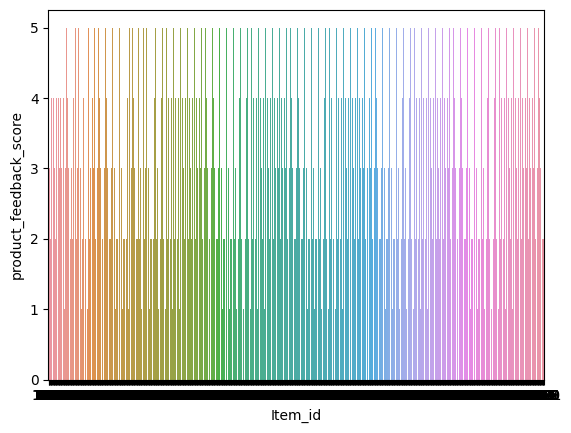

In [68]:
sns.barplot(x=df['Item_id'], y=df['product_feedback_score'], data=df)
plt.show()

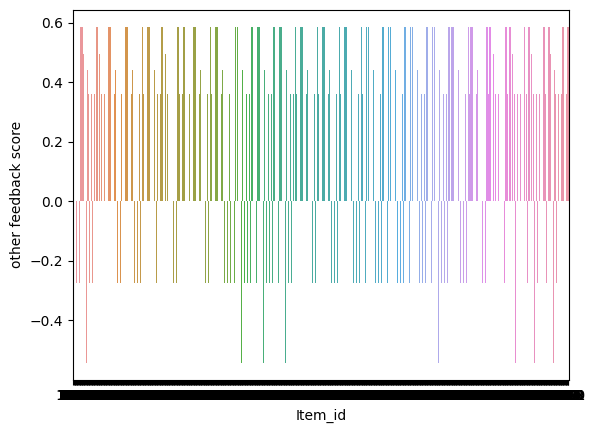

In [69]:
sns.barplot(x=df['Item_id'], y=df['other feedback score'], data=df)
plt.show()

In [58]:
df['product_feedback_score_1'] = ''
df.loc[df['product feedback'] == 'Extremely Poor', 'product_feedback_score_1'] = -1
df.loc[df['product feedback'] == 'strongly diagree', 'product_feedback_score_1'] = -1
df.loc[df['product feedback'] == 'disagree', 'product_feedback_score_1'] = -1
df.loc[df['product feedback'] == 'agree', 'product_feedback_score_1'] = 1
df.loc[df['product feedback'] == 'strongly agree', 'product_feedback_score_1'] = 1

In [61]:
df['other_feedback_score_1'] = ''
df.loc[df['other feedback score'] < 0, 'other feedback score 1'] = -1
df.loc[df['other feedback score'] >= 0, 'other feedback score 1'] = 1

In [64]:
correlation = df['product_feedback_score_1'].corr(df['other feedback score 1'], method='spearman')

print("Spearman rank correlation coefficient:", correlation)

Spearman rank correlation coefficient: 0.00619890189254449
